#**Importing Essentials Libraries**

In [39]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import random


#**Loading data from Google Drive**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data : My Voice**
Extracted Formants (f1,f2) from Audio file with help of wavesurfer software 


In [41]:
df_a = pd.read_csv('/content/drive/MyDrive/data ceet/aa.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_e = pd.read_csv('/content/drive/MyDrive/data ceet/ee.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_i = pd.read_csv('/content/drive/MyDrive/data ceet/ii.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_o = pd.read_csv('/content/drive/MyDrive/data ceet/oo.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_u = pd.read_csv('/content/drive/MyDrive/data ceet/uu.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )

**Data : Professional Speaker (Female)** Extracted formants from the audio file recorded from online source

In [42]:
df_a_f = pd.read_csv('/content/drive/MyDrive/Audio/female/aa.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_e_f = pd.read_csv('/content/drive/MyDrive/Audio/female/ee.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_i_f = pd.read_csv('/content/drive/MyDrive/Audio/female/ii.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_o_f = pd.read_csv('/content/drive/MyDrive/Audio/female/oo.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_u_f = pd.read_csv('/content/drive/MyDrive/Audio/female/uu.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )

**Data : Professional Speaker (Male)** Extracted formants from the audio file recorded from online source

In [43]:
df_a_m = pd.read_csv('/content/drive/MyDrive/Audio/male/aa.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_e_m = pd.read_csv('/content/drive/MyDrive/Audio/male/ee.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_i_m = pd.read_csv('/content/drive/MyDrive/Audio/male/ii.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_o_m = pd.read_csv('/content/drive/MyDrive/Audio/male/oo.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )
df_u_m = pd.read_csv('/content/drive/MyDrive/Audio/male/uu.txt', skiprows=6,  delim_whitespace=True, header=None, names=range(4) )

In [44]:
def remove_silence(X_D):
  X_D = X_D.drop(X_D[(X_D[0]==500) & (X_D[1] == 1500)].index)
  return X_D

df_a = remove_silence(df_a)
df_e= remove_silence(df_e)

df_i = remove_silence(df_i)

df_o = remove_silence(df_o)
df_u = remove_silence(df_u)


**Merge Data**

In [45]:
frames = [df_a, df_e, df_i,df_o, df_u]
X= pd.concat(frames)

In [46]:
frames_f = [df_a_f, df_e_f, df_i_f,df_o_f, df_u_f]
X_f= pd.concat(frames_f)

In [47]:
frames_m= [df_a_m, df_e_m, df_i_m,df_o_m, df_u_m]
X_m= pd.concat(frames_m)

#**Plotting vowels**

###**My Voice**

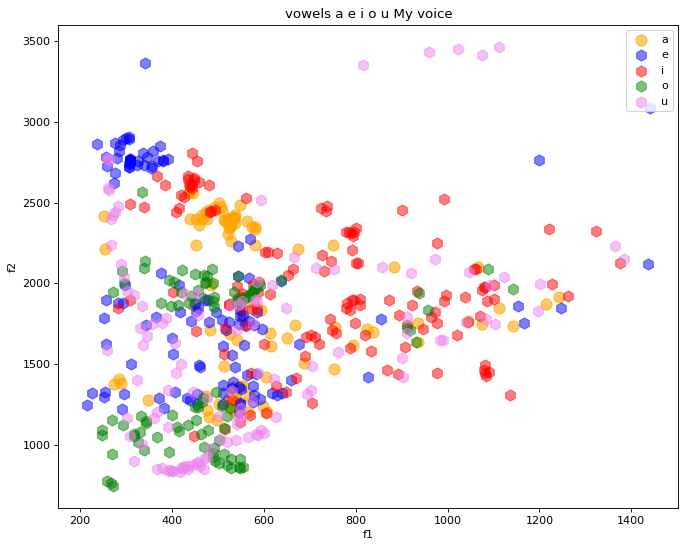

In [48]:
figure(figsize=(10, 8), dpi=80)

plt.title('vowels a e i o u My voice')
plt.xlabel('f1')
plt.ylabel('f2')
plt.scatter(x=df_a[0],y=df_a[1],s=100,c='orange' ,alpha=0.6,marker='o' ,label = "a")
plt.scatter(x=df_e[0],y=df_e[1],s=100,c='blue',alpha=0.5,marker='h',label = "e")
plt.scatter(x=df_i[0],y=df_i[1],s=100,c='red',alpha=0.5,marker='h',label = "i")
plt.scatter(x=df_o[0],y=df_o[1],s=100,c='green',alpha=0.5,marker='h',label = "o")
plt.scatter(x=df_u[0],y=df_u[1],s=100,c='violet',alpha=0.5,marker='h',label = "u")
plt.legend(loc="upper right")

plt.show()

###**Female Speaker(Professional)**



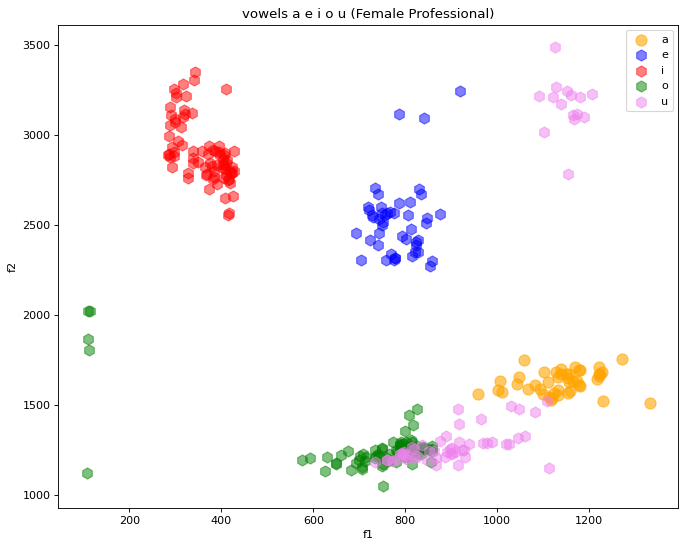

In [49]:
figure(figsize=(10, 8), dpi=80)

plt.title('vowels a e i o u (Female Professional)')
plt.xlabel('f1')
plt.ylabel('f2')
plt.scatter(x=df_a_f[0],y=df_a_f[1],s=100,c='orange' ,alpha=0.6,marker='o' ,label = "a")
plt.scatter(x=df_e_f[0],y=df_e_f[1],s=100,c='blue',alpha=0.5,marker='h',label = "e")
plt.scatter(x=df_i_f[0],y=df_i_f[1],s=100,c='red',alpha=0.5,marker='h',label = "i")
plt.scatter(x=df_o_f[0],y=df_o_f[1],s=100,c='green',alpha=0.5,marker='h',label = "o")
plt.scatter(x=df_u_f[0],y=df_u_f[1],s=100,c='violet',alpha=0.5,marker='h',label = "u")
plt.legend(loc="upper right")

plt.show()

###**Male Speaker(Professional)**


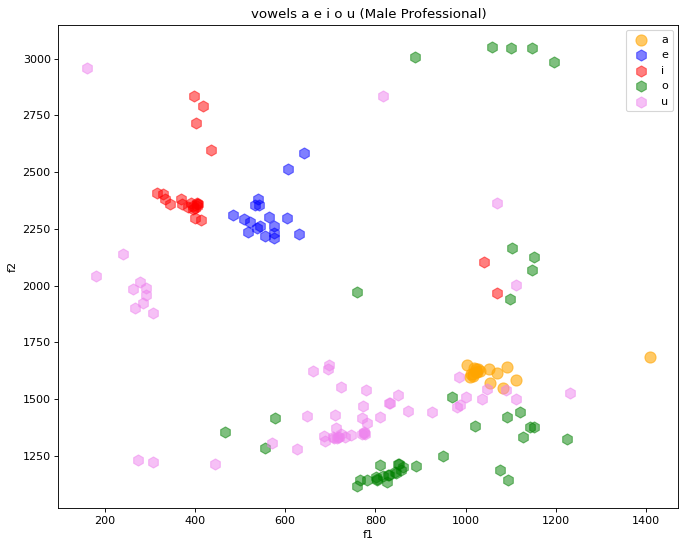

In [50]:
figure(figsize=(10, 8), dpi=80)

plt.title('vowels a e i o u (Male Professional)')
plt.xlabel('f1')
plt.ylabel('f2')
plt.scatter(x=df_a_m[0],y=df_a_m[1],s=100,c='orange' ,alpha=0.6,marker='o' ,label = "a")
plt.scatter(x=df_e_m[0],y=df_e_m[1],s=100,c='blue',alpha=0.5,marker='h',label = "e")
plt.scatter(x=df_i_m[0],y=df_i_m[1],s=100,c='red',alpha=0.5,marker='h',label = "i")
plt.scatter(x=df_o_m[0],y=df_o_m[1],s=100,c='green',alpha=0.5,marker='h',label = "o")
plt.scatter(x=df_u_m[0],y=df_u_m[1],s=100,c='violet',alpha=0.5,marker='h',label = "u")
plt.legend(loc="upper right")

plt.show()

#**Clustering With Library**

##My Voice

In [51]:

kmeans = KMeans(n_clusters=5)
X['cluster'] = kmeans.fit_predict(X[[0, 1]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

X['cen_x'] = X.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
X['cen_y'] = X.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['orange', 'blue', 'red','green','violet' ]
X['c'] = X.cluster.map({0:colors[0], 1:colors[1], 2:colors[2] , 3:colors[3],4:colors[4]})


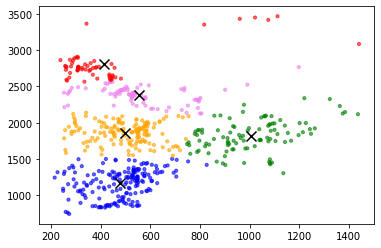

In [52]:
plt.scatter(X[0], X[1], c=X.c, alpha = 0.6, s=10)
plt.scatter(cen_x,cen_y,marker = "x",color ="black", s= 100)


##Female Professional

In [53]:

kmeans = KMeans(n_clusters=5)
X_f['cluster'] = kmeans.fit_predict(X_f[[0, 1]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

X_f['cen_x'] = X_f.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
X_f['cen_y'] = X_f.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['orange', 'blue', 'red','green','violet' ]
X_f['c'] = X_f.cluster.map({0:colors[0], 1:colors[1], 2:colors[2] , 3:colors[3],4:colors[4]})

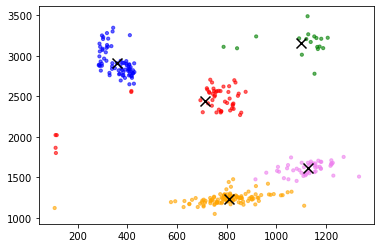

In [54]:
plt.scatter(X_f[0], X_f[1], c=X_f.c, alpha = 0.6, s=10)
plt.scatter(cen_x,cen_y,marker = "x",color ="black", s= 100)

##Male Professional

In [55]:

kmeans = KMeans(n_clusters=5)
X_m['cluster'] = kmeans.fit_predict(X_m[[0, 1]])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

X_m['cen_x'] = X_m.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
X_m['cen_y'] = X_m.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['orange', 'blue', 'red','green','violet' ]
X_m['c'] = X_m.cluster.map({0:colors[0], 1:colors[1], 2:colors[2] , 3:colors[3],4:colors[4]})

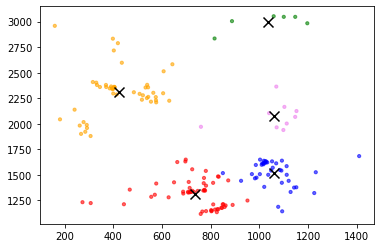

In [56]:
plt.scatter(X_m[0], X_m[1], c=X_m.c, alpha = 0.6, s=10)
plt.scatter(cen_x,cen_y,marker = "x",color ="black", s= 100)

In [57]:
X=X.drop(2,axis=1)
X=X.drop(3,axis=1)
X=X.drop('cluster',axis=1)
X=X.drop('cen_x',axis=1)
X=X.drop('cen_y',axis=1)
X=X.drop('c',axis=1)


In [58]:
X_f=X_f.drop(2,axis=1)
X_f=X_f.drop(3,axis=1)
X_f=X_f.drop('cluster',axis=1)
X_f=X_f.drop('cen_x',axis=1)
X_f=X_f.drop('cen_y',axis=1)
X_f=X_f.drop('c',axis=1)


In [59]:
X_m=X_m.drop(2,axis=1)
X_m=X_m.drop(3,axis=1)
X_m=X_m.drop('cluster',axis=1)
X_m=X_m.drop('cen_x',axis=1)
X_m=X_m.drop('cen_y',axis=1)
X_m=X_m.drop('c',axis=1)


#**Clustering Without Library**

In [60]:
def ED(X1,Y1):
  dist = np.sqrt(np.dot(X1-Y1,X1-Y1))
  return dist

##My voice

In [61]:
centroids = X[0:5]
X= np.array(X)

def cluster_data(data,centroids1):
  distance = []
  data_group = []

  for i in range(0,data.shape[0]):
    for j in range(0,centroids1.shape[0]):
      print(centroids1[j])
      dist = ED(centroids1[j],data[i])
      distance.append(dist)
    min_dis = min(distance)
    index_dis = distance.index(min_dis)

    data_group.append(index_dis)
    distance.clear()

  return np.array(data_group)

In [62]:


def update_centroid(X,cluster):
  new_centroids = []
  for i in range(5):
    mean_cent = X[np.where(cluster == i)].mean(axis=0)
        # print(mean_cent)
        
    new_centroids.append(mean_cent)
        # print(new_centroids)
        
  return np.array(new_centroids)

iteration  = 10

in_centroid= np.array(centroids)

for i  in range(iteration):
    
    old_centroid = np.array(in_centroid)

    cluster = cluster_data(X,old_centroid)

    #print(cluster)

    in_centroid  = update_centroid(X,cluster)
    if (in_centroid == old_centroid).all():
        break
print(in_centroid)

Streaming output truncated to the last 5000 lines.
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824.00259923]
[ 477.71669786 1168.60238084]
[ 499.2561401  1858.88137999]
[ 549.39956716 2379.07129455]
[ 413.52423736 2806.28068296]
[1002.5408615  1824

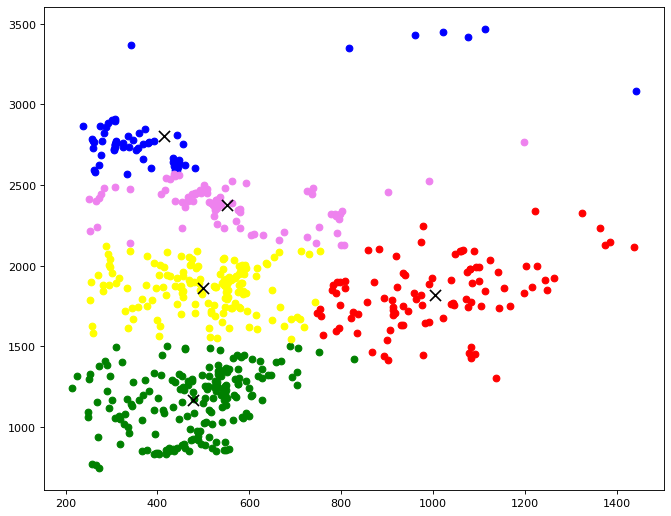

In [63]:
figure(figsize=(10, 8), dpi=80)

plt.scatter(X[cluster == 0,0],X[cluster == 0,1],color='blue')
plt.scatter(X[cluster == 1,0],X[cluster == 1,1],color='red')
plt.scatter(X[cluster == 2,0],X[cluster == 2,1],color='green')
plt.scatter(X[cluster == 3,0],X[cluster == 3,1],color='yellow')
plt.scatter(X[cluster == 4,0],X[cluster == 4,1],color='violet')
plt.scatter(in_centroid[:,0],in_centroid[:,1],marker = "x",color ="black", s= 100)

#Female Speaker(Professional)

In [66]:
centroids = X_f[0:5]
X_f= np.array(X_f)
iteration  = 10

in_centroid= np.array(centroids)

for i  in range(iteration):
    
    old_centroid = np.array(in_centroid)

    cluster = cluster_data(X_f,old_centroid)

    #print(cluster)

    in_centroid  = update_centroid(X_f,cluster)
    if (in_centroid == old_centroid).all():
        break
print(in_centroid)

Streaming output truncated to the last 5000 lines.
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545.50646973]
[1119.84655762 1538.18432617]
[1332.23730469 1510.31152344]
[1153.48571777 1565.65197754]
[1132.93798828 1552.31201172]
[1112.70385742 1545

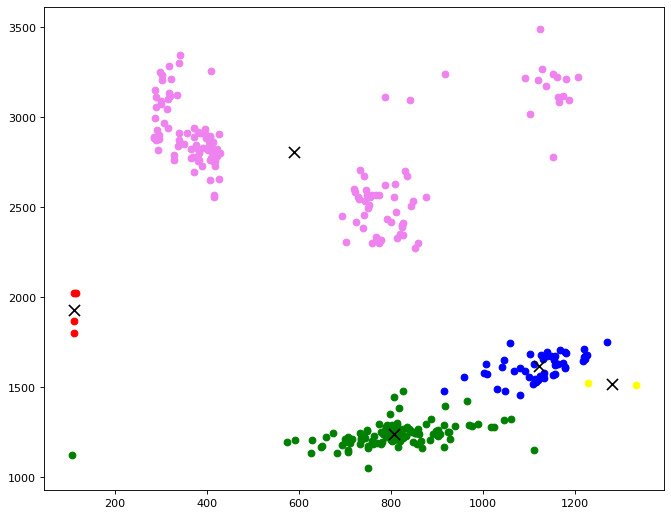

In [67]:
figure(figsize=(10, 8), dpi=80)

plt.scatter(X_f[cluster == 0,0],X_f[cluster == 0,1],color='blue')
plt.scatter(X_f[cluster == 1,0],X_f[cluster == 1,1],color='red')
plt.scatter(X_f[cluster == 2,0],X_f[cluster == 2,1],color='green')
plt.scatter(X_f[cluster == 3,0],X_f[cluster == 3,1],color='yellow')
plt.scatter(X_f[cluster == 4,0],X_f[cluster == 4,1],color='violet')
plt.scatter(in_centroid[:,0],in_centroid[:,1],marker = "x",color ="black", s= 100)

#Male Speaker (Professional)

In [69]:
centroids = X_m[0:5]
X_m= np.array(X_m)
iteration  = 10

in_centroid= np.array(centroids)

for i  in range(iteration):
    
    old_centroid = np.array(in_centroid)

    cluster = cluster_data(X_m,old_centroid)

    #print(cluster)

    in_centroid  = update_centroid(X_m,cluster)
    if (in_centroid == old_centroid).all():
        break
print(in_centroid)

Streaming output truncated to the last 5000 lines.
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439.9373198 ]
[ 489.81354592 2387.69237172]
[1005.99066805 1613.41789165]
[1061.02562798 2078.54991319]
[ 735.12547496 1310.33943315]
[1091.46569243 1439

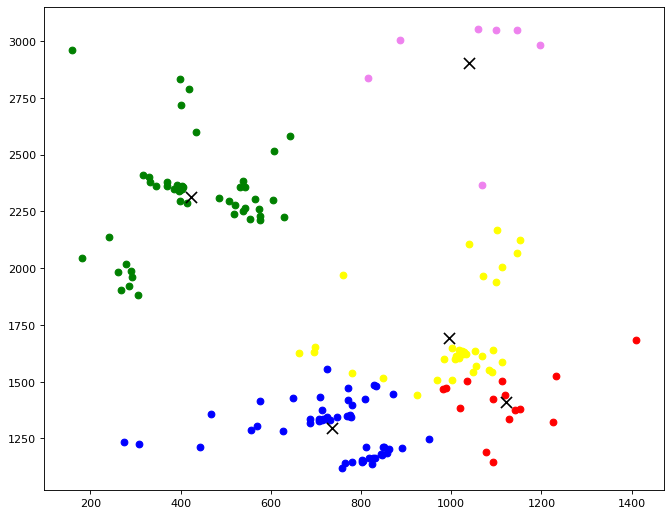

In [70]:
figure(figsize=(10, 8), dpi=80)

plt.scatter(X_m[cluster == 0,0],X_m[cluster == 0,1],color='blue')
plt.scatter(X_m[cluster == 1,0],X_m[cluster == 1,1],color='red')
plt.scatter(X_m[cluster == 2,0],X_m[cluster == 2,1],color='green')
plt.scatter(X_m[cluster == 3,0],X_m[cluster == 3,1],color='yellow')
plt.scatter(X_m[cluster == 4,0],X_m[cluster == 4,1],color='violet')
plt.scatter(in_centroid[:,0],in_centroid[:,1],marker = "x",color ="black", s= 100)